In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'
           , 'DiabetesPedigreeFunction', 'Age','Target']

In [3]:
pima = pd.read_csv('Pima.csv',names=columns)

In [4]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Target                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


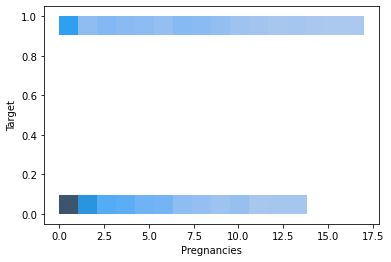

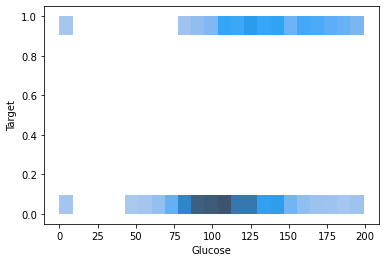

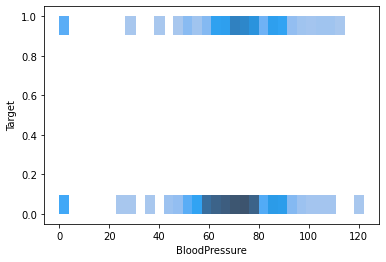

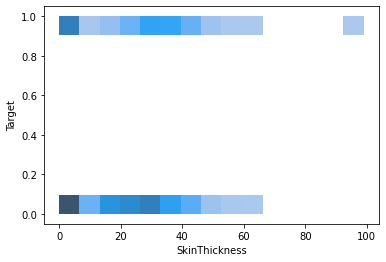

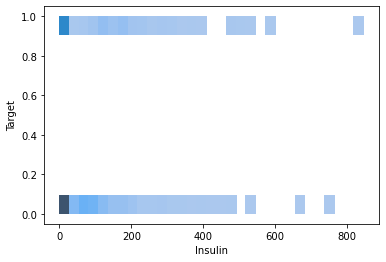

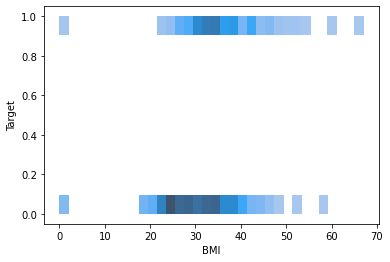

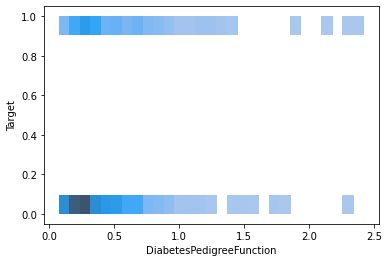

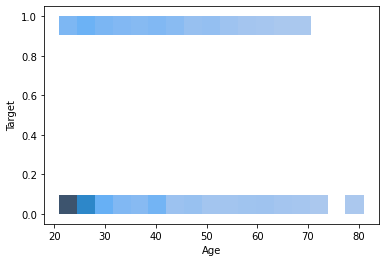

In [7]:
for col in columns[:-1]:
    plt.figure()
    sns.histplot(data=pima,x=col,y='Target')

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [51]:
X=pima.iloc[:,:8]
y = pima.iloc[:,8:]
accuracy=[]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
for k in range(1,16):
    print("k = ",k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train.values.ravel(), cv=5, scoring='accuracy')
    print(scores)
    acc = scores.mean()
    print("mean accuracy for k = ",k,"is : ",acc)
    accuracy.append(acc)
    print("*******************")

k =  1
[0.63414634 0.66666667 0.63414634 0.74796748 0.69672131]
mean accuracy for k =  1 is :  0.6759296281487405
*******************
k =  2
[0.72357724 0.69105691 0.70731707 0.72357724 0.72131148]
mean accuracy for k =  2 is :  0.7133679861388778
*******************
k =  3
[0.73170732 0.67479675 0.68292683 0.73170732 0.68852459]
mean accuracy for k =  3 is :  0.7019325603092097
*******************
k =  4
[0.69105691 0.71544715 0.7398374  0.71544715 0.70491803]
mean accuracy for k =  4 is :  0.7133413301346129
*******************
k =  5
[0.72357724 0.71544715 0.76422764 0.74796748 0.70491803]
mean accuracy for k =  5 is :  0.7312275089964014
*******************
k =  6
[0.7398374  0.76422764 0.73170732 0.71544715 0.69672131]
mean accuracy for k =  6 is :  0.7295881647341064
*******************
k =  7
[0.72357724 0.75609756 0.75609756 0.70731707 0.72131148]
mean accuracy for k =  7 is :  0.732880181260829
*******************
k =  8
[0.75609756 0.76422764 0.76422764 0.72357724 0.69672131]

In [53]:
print(accuracy)

[0.6759296281487405, 0.7133679861388778, 0.7019325603092097, 0.7133413301346129, 0.7312275089964014, 0.7295881647341064, 0.732880181260829, 0.7409702785552446, 0.7344795415167267, 0.7393442622950819, 0.7345061975209916, 0.7393309342929494, 0.7361322137811541, 0.7344662135145942, 0.7230840996934559]


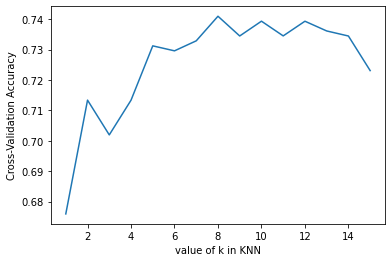

In [55]:
k_range = range(1,16)
plt.plot(k_range,accuracy)
plt.xlabel('value of k in KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [ ]:
# Accuracy max for k=8

In [85]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_test,y_test.values.ravel())
y_pred = knn.predict(X_test)
print(knn.score(X_test,y_test))


0.8051948051948052


In [60]:
confusion_matrix(y_test,y_pred)

array([[113,   0],
       [ 30,  11]])

In [71]:
X_train_std = (X_train-X_train.mean())/X_train.std()
X_test_std = (X_test-X_test.mean())/X_test.std()

In [79]:
accuracy_std=[]

In [80]:
for k in range(1,16):
    print("k = ",k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train_std, y_train.values.ravel(), cv=5, scoring='accuracy')
    print(scores)
    acc = scores.mean()
    print("mean accuracy for k = ",k,"is : ",acc)
    accuracy_std.append(acc)
    print("*******************")

k =  1
[0.69105691 0.73170732 0.7398374  0.69918699 0.71311475]
mean accuracy for k =  1 is :  0.7149806743969079
*******************
k =  2
[0.7398374  0.69918699 0.70731707 0.65853659 0.68032787]
mean accuracy for k =  2 is :  0.6970411835265894
*******************
k =  3
[0.74796748 0.74796748 0.7398374  0.7398374  0.69672131]
mean accuracy for k =  3 is :  0.7344662135145942
*******************
k =  4
[0.73170732 0.75609756 0.72357724 0.74796748 0.68032787]
mean accuracy for k =  4 is :  0.7279354924696788
*******************
k =  5
[0.76422764 0.7398374  0.72357724 0.74796748 0.70491803]
mean accuracy for k =  5 is :  0.7361055577768892
*******************
k =  6
[0.74796748 0.73170732 0.77235772 0.7398374  0.71311475]
mean accuracy for k =  6 is :  0.7409969345595095
*******************
k =  7
[0.7398374  0.76422764 0.71544715 0.7804878  0.72131148]
mean accuracy for k =  7 is :  0.7442622950819672
*******************
k =  8
[0.72357724 0.70731707 0.74796748 0.74796748 0.69672131

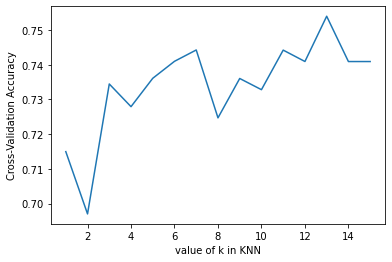

In [82]:
k_range = range(1,16)
plt.plot(k_range,accuracy_std)
plt.xlabel('value of k in KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [83]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_test_std,y_test.values.ravel())
y_pred = knn.predict(X_test_std)
print(knn.score(X_test_std,y_test))

0.7662337662337663


In [ ]:
# best 13